# ABC Atlas Content Walkthrough - v20230830

In [1]:
from pathlib import Path
# import json

import pandas as pd
import anndata as ad
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Load abc atlas data

In [2]:
abc_root = Path("/data/abc_atlas/")
brain_id = 'C57BL6J-638850'
version = '20230830'

In [3]:
# load expression matrix for log2 counts
adata_log2 = ad.read_h5ad(abc_root/f"expression_matrices/MERFISH-{brain_id}/{version}/{brain_id}-log2.h5ad", backed='r')

In [4]:
# load in the cell metadata
gene_md_df = pd.read_csv(abc_root/f'metadata/MERFISH-{brain_id}/{version}/gene.csv', 
                         dtype={'cell_label':str},
                         index_col=0)

In [5]:
# load in the cell metadata
cell_md_df = pd.read_csv(abc_root/f'metadata/MERFISH-{brain_id}/{version}/cell_metadata.csv', 
                         dtype={'cell_label':str},
                         index_col=0)

In [6]:
# load in the _cluster_annotation metadata csv
cluster_md_df = pd.read_csv(abc_root/f'metadata/MERFISH-{brain_id}/{version}/views/cell_metadata_with_cluster_annotation.csv', 
                            dtype={'cell_label':str},
                            index_col=0)

In [7]:
# load in the _parcellation_annotation metadata csv
ccf_md_df = pd.read_csv(abc_root/f'metadata/MERFISH-{brain_id}-CCF/{version}/views/cell_metadata_with_parcellation_annotation.csv', 
                        dtype={'cell_label':str},
                        index_col=0)

# # flip y coords so the sections don't display upside down
# flip_y=True
# if flip_y:
#     ccf_md_df[['y_section', 'y_reconstructed']] *= -1

# What's in each metadata file?

## expression matrices (log2 & raw) h5ad

- 4,334,174 cells (~4.3 million)

In [8]:
print(f'{adata_log2.n_obs=}')
adata_log2

adata_log2.n_obs=4334174


AnnData object with n_obs × n_vars = 4334174 × 550 backed at '/data/abc_atlas/expression_matrices/MERFISH-C57BL6J-638850/20230830/C57BL6J-638850-log2.h5ad'
    obs: 'brain_section_label'
    var: 'gene_symbol', 'transcript_identifier'
    uns: 'accessed_on', 'src'

## gene.csv metadata

In [9]:
print(f'{len(gene_md_df)=}')
gene_md_df

len(gene_md_df)=550


,gene_symbol,transcript_identifier,name,mapped_ncbi_identifier
gene_identifier,,,,
ENSMUSG00000026778,Prkcq,ENSMUST00000028118,"protein kinase C, theta",NCBIGene:18761
ENSMUSG00000026837,Col5a1,ENSMUST00000028280,"collagen, type V, alpha 1",NCBIGene:12831
ENSMUSG00000001985,Grik3,ENSMUST00000030676,"glutamate receptor, ionotropic, kainate 3",NCBIGene:14807
ENSMUSG00000039323,Igfbp2,ENSMUST00000047328,insulin-like growth factor binding protein 2,NCBIGene:16008
ENSMUSG00000048387,Osr1,ENSMUST00000057021,odd-skipped related transcription factor 1,NCBIGene:23967
...,...,...,...,...
Blank-33,Blank-33,Blank-33,NaN,NaN
Blank-34,Blank-34,Blank-34,NaN,NaN
Blank-45,Blank-45,Blank-45,NaN,NaN


## cell_metadata.csv

Already at this stage, MK has filtered out the cells with average_correlation_score < 0.5, along with cells that didn't meet volume/gene count/etc. QC criteria.

So, there is no way to access all cells with their minimally-useful set of metadata (i.e. cell_labels + expression matrix + xyz coords)

In [10]:
print(f'{len(cell_md_df)=}')
cell_md_df.head(5)

len(cell_md_df)=3938808


,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z
cell_label,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4


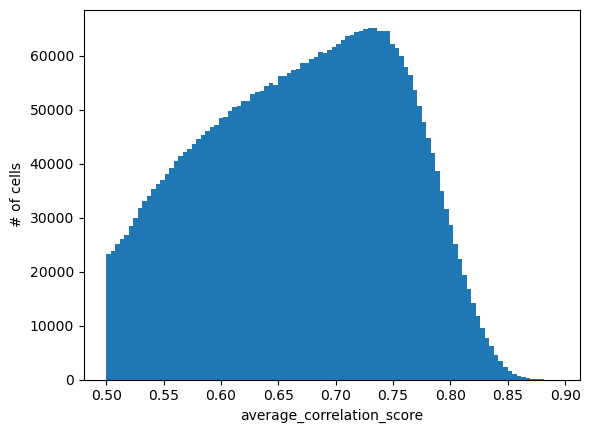

In [11]:
# counts, bins = np.histogram(cell_md_df['average_correlation_score'].values)
fig = plt.figure()
ax = plt.gca()
ax.hist(cell_md_df['average_correlation_score'].values, bins=100)
ax.set_xlabel('average_correlation_score')
ax.set_ylabel('# of cells')
plt.show()

## cell_metadata_with_cluster_annotation.csv

In [12]:
print(f'{len(ccf_md_df)=}')
print(cluster_md_df.columns)
cluster_md_df.head(3)

len(ccf_md_df)=3739961
Index(['brain_section_label', 'cluster_alias', 'average_correlation_score',
       'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex',
       'x', 'y', 'z', 'neurotransmitter', 'class', 'subclass', 'supertype',
       'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color',
       'supertype_color', 'cluster_color'],
      dtype='object')


,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,NaN,04 DG-IMN Glut,038 DG-PIR Ex IMN,0141 DG-PIR Ex IMN_2,0515 DG-PIR Ex IMN_2,#666666,#16f2f2,#3D53CC,#CC7A3D,#73FFBF
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63


## cell_metadata_with_parcellation_annotation.csv

In [13]:
print(f'{len(ccf_md_df)=}')
print(ccf_md_df.columns)
ccf_md_df.head(3)

len(ccf_md_df)=3739961
Index(['brain_section_label', 'cluster_alias', 'average_correlation_score',
       'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex',
       'x_section', 'y_section', 'z_section', 'neurotransmitter', 'class',
       'subclass', 'supertype', 'cluster', 'neurotransmitter_color',
       'class_color', 'subclass_color', 'supertype_color', 'cluster_color',
       'x_reconstructed', 'y_reconstructed', 'z_reconstructed',
       'parcellation_index', 'x_ccf', 'y_ccf', 'z_ccf', 'parcellation_organ',
       'parcellation_category', 'parcellation_division',
       'parcellation_structure', 'parcellation_substructure',
       'parcellation_organ_color', 'parcellation_category_color',
       'parcellation_division_color', 'parcellation_structure_color',
       'parcellation_substructure_color'],
      dtype='object')


,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x_section,y_section,z_section,...,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure,parcellation_organ_color,parcellation_category_color,parcellation_division_color,parcellation_structure_color,parcellation_substructure_color
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,...,brain,grey,HPF,DG,DG-po,#FFFFFF,#BFDAE3,#7ED04B,#7ED04B,#7ED04B
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,...,brain,grey,P,TRN,TRN,#FFFFFF,#BFDAE3,#FF9B88,#FFBA86,#FFBA86
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,...,brain,grey,P,P-unassigned,P-unassigned,#FFFFFF,#BFDAE3,#FF9B88,#FF9B88,#FF9B88


# What are the different xyz coordinates?

In [14]:
# get just the sections that contain the TH
th_z_sections = [4.8, 5.0, 5.4, 5.6, 5.8, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.6, 7.8, 8.0, 8.2]

# correct overprecision in some z coords
ccf_md_df['z_reconstructed'] = ccf_md_df['z_reconstructed'].round(1)
ccf_md_df['z_section'] = ccf_md_df['z_section'].round(1)

## section vs reconstructed vs ccf coords

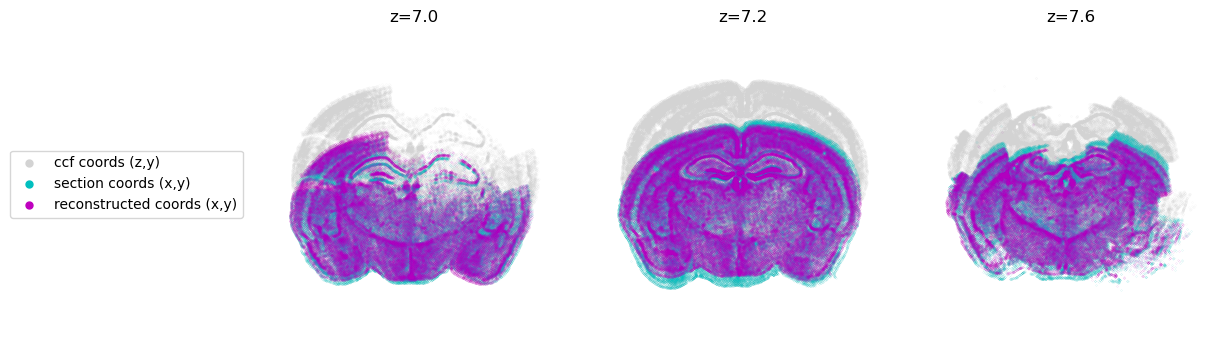

In [15]:
n_col = 3
n_row = int(np.ceil(len(th_z_sections[9:12]) / n_col))
fig, axes = plt.subplots(n_row, n_col, figsize=(12,4))
axes = axes.ravel()

for i, z in enumerate(th_z_sections[9:12]):
    ax = axes[i]
    curr_sec_df = ccf_md_df[(ccf_md_df['z_reconstructed']==z)]
    
    ax.scatter(curr_sec_df['z_ccf'], -curr_sec_df['y_ccf'],
                s=0.01, c='lightgrey', marker='.', label='ccf coords (z,y)')
    ax.scatter(curr_sec_df['x_section'], -curr_sec_df['y_section'],
                s=0.01, c='c', marker='.', label='section coords (x,y)')
    ax.scatter(curr_sec_df['x_reconstructed'], -curr_sec_df['y_reconstructed'],
                s=0.01, c='m', marker='.', label='reconstructed coords (x,y)')
    
    if i==0:
        ax.legend(markerscale=100, loc='center right', bbox_to_anchor=(-0.1,0.5))
    
    ax.set_title('z='+str(z))
    ax.axis('equal')
    ax.axis('off')

## which coords align with the rasterized CCF volumes?

In [16]:
import nibabel
annotation_im = nibabel.load('/data/abc_atlas/image_volumes/MERFISH-C57BL6J-638850-CCF/20230630/resampled_annotation.nii.gz')
annotation_im = np.array(annotation_im.dataobj)

annotation_boundary_im = nibabel.load('/data/abc_atlas/image_volumes/MERFISH-C57BL6J-638850-CCF/20230630/resampled_annotation_boundary.nii.gz')
annotation_boundary_im = np.array(annotation_boundary_im.dataobj)

In [17]:
def plot_section( xx=None, yy=None, cc=None, val=None, pcmap=None, 
                 overlay=None, extent=None, bcmap=plt.cm.Greys_r, alpha=1.0,
                 fig_width = 6, fig_height = 6 ) :
    
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)

    if xx is not None and yy is not None and pcmap is not None :
        plt.scatter(xx,yy,s=0.1,c=val,marker='.',cmap=pcmap)
    elif xx is not None and yy is not None and cc is not None :
        plt.scatter(xx,yy,s=0.1,color=cc,marker='.',zorder=1)   
        
    if overlay is not None and extent is not None and bcmap is not None :
        plt.imshow(overlay, cmap=bcmap, extent=extent,alpha=alpha,zorder=2)
        
    ax.set_ylim(11,0)
    ax.set_xlim(0,11)
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

In [18]:
brain_section = 'C57BL6J-638850.40'
pred = (ccf_md_df['brain_section_label'] == brain_section )
section = ccf_md_df[pred]
print(f'{len(section)=}')

zindex = int(section.iloc[0]['z_reconstructed'] / 0.2)
print(f'{zindex=}')

resolution = 10e-3
extent = (np.array([0, annotation_boundary_im.shape[1], annotation_boundary_im.shape[0], 0]) - 0.5) * resolution

boundary_slice = annotation_boundary_im[:,:,zindex].T

len(section)=104572
zindex=36


### x/y_reconstructed coords match resampled_annotation image volume

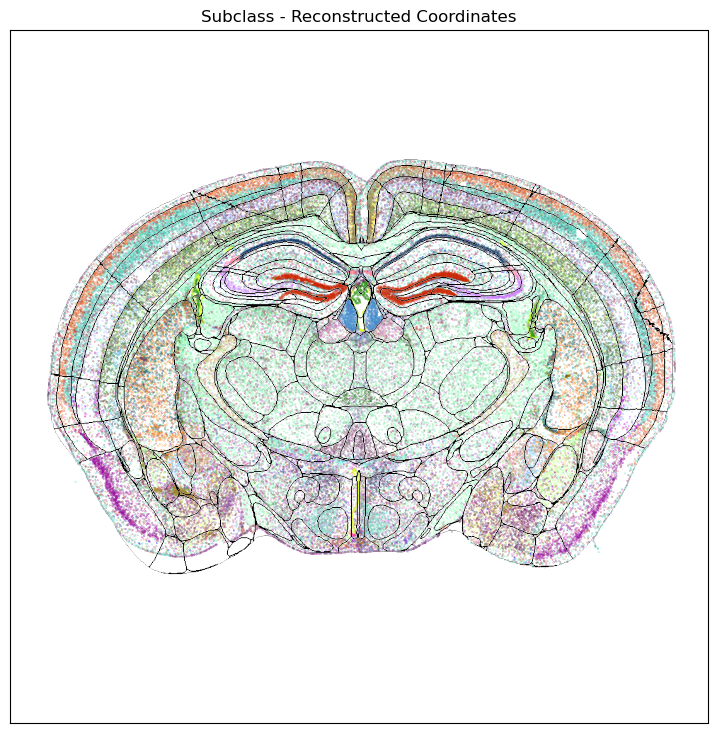

In [19]:
fig, ax = plot_section(section['x_reconstructed'], section['y_reconstructed'], 
                        cc=section['subclass_color'],
                        overlay=boundary_slice, extent=extent, 
                        bcmap=plt.cm.Greys, alpha = 1.0*(boundary_slice>0),
                        fig_width = 9, fig_height = 9 )
res = ax.set_title("Subclass - Reconstructed Coordinates")

### x/y_section coords do NOT match resampled_annotation image volume

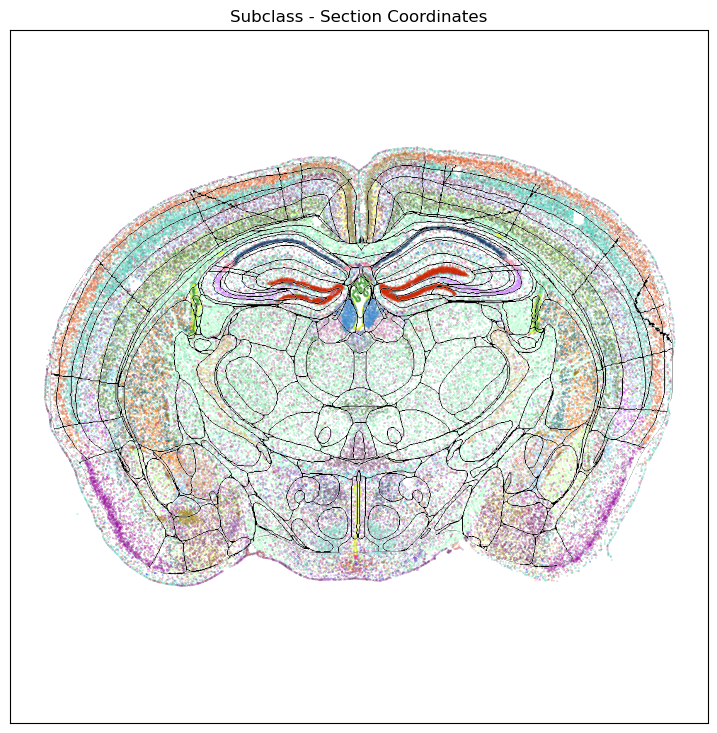

In [20]:
fig, ax = plot_section(section['x_section'], section['y_section'], 
                        cc=section['subclass_color'],
                        overlay=boundary_slice, extent=extent, 
                        bcmap=plt.cm.Greys, alpha = 1.0*(boundary_slice>0),
                        fig_width = 9, fig_height = 9 )
res = ax.set_title("Subclass - Section Coordinates")